In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import yaml
import os
import json
import re
import ast
import csv
import gensim
from searchtweets import ResultStream, gen_request_parameters, load_credentials, collect_results
# import fastText as ft
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import datetime, timedelta


%matplotlib inline
pd.set_option("display.max_rows", 500)

C:\Users\USER\anaconda3\envs\endsarsproject\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
df =pd.read_pickle('data.pkl')

In [4]:
df

,id,author_id,text,created_at,in_reply_to_user_id,geo,users,tweets,places,newest_id,...,users_location,user_public_metrics,user_location,user_created_at,user_name,user_verified,user_reply_count,user_like_count,user_quote_count,user_retweet_count
0,1225932207711281152.0,2848603625.0,Even God love dreads that was why he gave sams...,2020-02-07 23:59:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1225931294791602176.0,1177413556150636544.0,@segalink I honestly don't know why some peopl...,2020-02-07 23:56:12+00:00,14879097.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1225931236566282240.0,780516706959720448.0,If they #EndSARS as a department What about th...,2020-02-07 23:55:58+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1225931116315598848.0,1071185026476376064.0,Somebody saidSEX is the only time you're been ...,2020-02-07 23:55:29+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1225930876632096768.0,774674809.0,Forget about #EndSARS first #Arewatwitter do y...,2020-02-07 23:54:32+00:00,NaN,{'place_id': '005c6f3641f95852'},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67741,1333416067272744960,1342483380,RT @mplusbhaira: Her mama is still a killer. ...,2020-11-30 14:22:18+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'followers_count': 1566, 'following_count': 1...",Castle black,2013-04-10T17:55:40.000Z,Leke 🔞,False,None,None,None,None
67742,1333415989569069058,304992719,RT @jagganiyu: Northern Governors didn't hold ...,2020-11-30 14:22:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'followers_count': 987, 'following_count': 12...",Lagos-Ogun,2011-05-25T13:18:19.000Z,мσуσѕσяє®,False,None,None,None,None
67743,1333415978642911233,1322676745267486725,RT @Mazi_KokoMazta: 2021 hope u re hearing us ...,2020-11-30 14:21:57+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'followers_count': 21, 'following_count': 25,...","Federal Capital Territory, Nig",2020-10-31T23:08:31.000Z,Tecno elevator NGR LTD/Oxford group of company,False,None,None,None,None
67744,1333415965305032705,2900186977,RT @_MrsMalaprop: You people seem to have forg...,2020-11-30 14:21:54+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'followers_count': 74, 'following_count': 135...",NaN,2014-11-15T08:39:04.000Z,A. Dikko,False,None,None,None,None


In [5]:
df.reset_index(drop=True, inplace=True)


In [6]:
df

,id,author_id,text,created_at,in_reply_to_user_id,geo,users,tweets,places,newest_id,...,users_location,user_public_metrics,user_location,user_created_at,user_name,user_verified,user_reply_count,user_like_count,user_quote_count,user_retweet_count
0,1225932207711281152.0,2848603625.0,Even God love dreads that was why he gave sams...,2020-02-07 23:59:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1225931294791602176.0,1177413556150636544.0,@segalink I honestly don't know why some peopl...,2020-02-07 23:56:12+00:00,14879097.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1225931236566282240.0,780516706959720448.0,If they #EndSARS as a department What about th...,2020-02-07 23:55:58+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1225931116315598848.0,1071185026476376064.0,Somebody saidSEX is the only time you're been ...,2020-02-07 23:55:29+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1225930876632096768.0,774674809.0,Forget about #EndSARS first #Arewatwitter do y...,2020-02-07 23:54:32+00:00,NaN,{'place_id': '005c6f3641f95852'},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560999,1333416067272744960,1342483380,RT @mplusbhaira: Her mama is still a killer. ...,2020-11-30 14:22:18+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'followers_count': 1566, 'following_count': 1...",Castle black,2013-04-10T17:55:40.000Z,Leke 🔞,False,None,None,None,None
561000,1333415989569069058,304992719,RT @jagganiyu: Northern Governors didn't hold ...,2020-11-30 14:22:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'followers_count': 987, 'following_count': 12...",Lagos-Ogun,2011-05-25T13:18:19.000Z,мσуσѕσяє®,False,None,None,None,None
561001,1333415978642911233,1322676745267486725,RT @Mazi_KokoMazta: 2021 hope u re hearing us ...,2020-11-30 14:21:57+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'followers_count': 21, 'following_count': 25,...","Federal Capital Territory, Nig",2020-10-31T23:08:31.000Z,Tecno elevator NGR LTD/Oxford group of company,False,None,None,None,None
561002,1333415965305032705,2900186977,RT @_MrsMalaprop: You people seem to have forg...,2020-11-30 14:21:54+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'followers_count': 74, 'following_count': 135...",NaN,2014-11-15T08:39:04.000Z,A. Dikko,False,None,None,None,None


In [139]:
df['text'].iloc[67745]

'RT @_senitowobola_: We’ve come to far to give up #EndSARS #StopNigeriaGovernme'

In [7]:
#  Dropping unnecesary columns
df.drop([ 'in_reply_to_user_id', 'users', 'tweets',\
               'newest_id', 'oldest_id', 'result_count', 'next_token', 'geo', 'places'], inplace=True, axis=1)

# Dropping rows where all values are NA
df.dropna(inplace=True, subset=['text'])
from nltk.tokenize import WhitespaceTokenizer

# drop duplicate rows
df.drop_duplicates(subset='text', ignore_index=True, inplace=True)

In [8]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
stop_words = set(stopwords.words('english')) 


In [9]:
# Clean text

def clean_tweets(new):
    if type(new) == float:
        return np.nan
    else:
        new = new.lower()
        # remove RT
        new = re.sub(r'^rt[\s]+', '', new)
        # remove liks
        new = re.sub(r'https?:\/\/.*[\r\n]*', '', new)
        # remove \n
        new = new.replace('\n', ' ')
        # remove user mentions
        new = re.sub(r'@[\w]*', '', new)
        # remove punctuation
        new = re.sub('[.!,:;?]', '', new)
        # tokenize tweets
        new = WhitespaceTokenizer().tokenize(new)
        # remove stop word
        new = [w for w in new if not w in stop_words]

        return new

df['clean_text'] = df['text'].apply(clean_tweets)

#
df['joined_text'] = ''
for i in range(len(df['clean_text'])):
    df['joined_text'].iloc[i] = ' '.join(df['clean_text'].iloc[i])

C:\Users\USER\anaconda3\envs\endsarsproject\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
df

,id,author_id,text,created_at,location,users_created_at,name,username,verified,possibly_sensitive,...,user_location,user_created_at,user_name,user_verified,user_reply_count,user_like_count,user_quote_count,user_retweet_count,clean_text,joined_text
0,1225932207711281152.0,2848603625.0,Even God love dreads that was why he gave sams...,2020-02-07 23:59:49+00:00,"Lagos, Nigeria",2014-10-28T18:33:01.000Z,Carrot Top,carrotop_ds,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[even, god, love, dreads, gave, samson, unfort...",even god love dreads gave samson unfortunately...
1,1225931294791602176.0,1177413556150636544.0,@segalink I honestly don't know why some peopl...,2020-02-07 23:56:12+00:00,Women's Heart,2019-09-27T02:44:27.000Z,ExYorubaDemon,ExYoruba,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[honestly, know, people, would, think, sega, f...",honestly know people would think sega fraud in...
2,1225931236566282240.0,780516706959720448.0,If they #EndSARS as a department What about th...,2020-02-07 23:55:58+00:00,Africa,2016-09-26T21:17:39.000Z,Reginald's Son,uncle_dabs,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[#endsars, department, officers, running, depa...",#endsars department officers running departmen...
3,1225931116315598848.0,1071185026476376064.0,Somebody saidSEX is the only time you're been ...,2020-02-07 23:55:29+00:00,Nigeria,2018-12-07T23:29:46.000Z,WHERE UNA DEY SEE MONEY📸💦,Ugbedeojo_,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[somebody, saidsex, time, appreciated, coming,...",somebody saidsex time appreciated coming late ...
4,1225930876632096768.0,774674809.0,Forget about #EndSARS first #Arewatwitter do y...,2020-02-07 23:54:32+00:00,Cross River,2012-08-22T23:02:57.000Z,Nsikak Ibatt🇳🇬🇨🇦,NaughtyWrita,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[forget, #endsars, first, #arewatwitter, know,...",forget #endsars first #arewatwitter know propo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157673,1333416486111764480,1305462801591414784,RT @kaykay6_: Twitter people y Una no one patr...,2020-11-30 14:23:58+00:00,NaN,NaN,NaN,kaykay6_,NaN,False,...,NaN,2020-09-14T11:06:12.000Z,DEK💮,False,None,None,None,None,"[twitter, people, una, one, patronise, una, wa...",twitter people una one patronise una want mk c...
157674,1333416446685220878,2523665324,@taleebnaseer @muuftiahmad @BashirAhmaad Ba Mu...,2020-11-30 14:23:49+00:00,NaN,NaN,NaN,vincentadurojai,NaN,False,...,lagos,2014-05-25T23:28:06.000Z,ijige_afevame,False,None,None,None,None,"[ba, muna, #endsars, kuna, zagin, mu, ba, kuka...",ba muna #endsars kuna zagin mu ba kuka ce mu a...
157675,1333416313532915715,1108160767260540928,"RT @stewardjornsen: @channelstv In retrospect,...",2020-11-30 14:23:17+00:00,NaN,NaN,NaN,eniolathegreat,NaN,False,...,NaN,2019-03-20T00:18:10.000Z,eniolathegreat,False,None,None,None,None,"[retrospect, sounds, like, immediately, respon...",retrospect sounds like immediately responded #...
157676,1333416218301227010,793913444319756292,EPISODE 3 IS NOW LIVE! We have partnered with ...,2020-11-30 14:22:54+00:00,NaN,NaN,NaN,DeclarationsPod,NaN,False,...,"Cambridge, England",2016-11-02T20:31:30.000Z,Declarations Podcast,False,None,None,None,None,"[episode, 3, live, partnered, episode, investi...",episode 3 live partnered episode investigate s...


In [11]:
def remove_hashtags(data):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", data).split())
df['new_text'] = df['joined_text'].apply(remove_hashtags)


In [12]:
df

,id,author_id,text,created_at,location,users_created_at,name,username,verified,possibly_sensitive,...,user_created_at,user_name,user_verified,user_reply_count,user_like_count,user_quote_count,user_retweet_count,clean_text,joined_text,new_text
0,1225932207711281152.0,2848603625.0,Even God love dreads that was why he gave sams...,2020-02-07 23:59:49+00:00,"Lagos, Nigeria",2014-10-28T18:33:01.000Z,Carrot Top,carrotop_ds,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[even, god, love, dreads, gave, samson, unfort...",even god love dreads gave samson unfortunately...,even god love dreads gave samson unfortunately...
1,1225931294791602176.0,1177413556150636544.0,@segalink I honestly don't know why some peopl...,2020-02-07 23:56:12+00:00,Women's Heart,2019-09-27T02:44:27.000Z,ExYorubaDemon,ExYoruba,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[honestly, know, people, would, think, sega, f...",honestly know people would think sega fraud in...,honestly know people would think sega fraud in...
2,1225931236566282240.0,780516706959720448.0,If they #EndSARS as a department What about th...,2020-02-07 23:55:58+00:00,Africa,2016-09-26T21:17:39.000Z,Reginald's Son,uncle_dabs,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[#endsars, department, officers, running, depa...",#endsars department officers running departmen...,department officers running department long th...
3,1225931116315598848.0,1071185026476376064.0,Somebody saidSEX is the only time you're been ...,2020-02-07 23:55:29+00:00,Nigeria,2018-12-07T23:29:46.000Z,WHERE UNA DEY SEE MONEY📸💦,Ugbedeojo_,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[somebody, saidsex, time, appreciated, coming,...",somebody saidsex time appreciated coming late ...,somebody saidsex time appreciated coming late ...
4,1225930876632096768.0,774674809.0,Forget about #EndSARS first #Arewatwitter do y...,2020-02-07 23:54:32+00:00,Cross River,2012-08-22T23:02:57.000Z,Nsikak Ibatt🇳🇬🇨🇦,NaughtyWrita,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[forget, #endsars, first, #arewatwitter, know,...",forget #endsars first #arewatwitter know propo...,forget first know proposal went wrong universi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157673,1333416486111764480,1305462801591414784,RT @kaykay6_: Twitter people y Una no one patr...,2020-11-30 14:23:58+00:00,NaN,NaN,NaN,kaykay6_,NaN,False,...,2020-09-14T11:06:12.000Z,DEK💮,False,None,None,None,None,"[twitter, people, una, one, patronise, una, wa...",twitter people una one patronise una want mk c...,twitter people una one patronise una want mk c...
157674,1333416446685220878,2523665324,@taleebnaseer @muuftiahmad @BashirAhmaad Ba Mu...,2020-11-30 14:23:49+00:00,NaN,NaN,NaN,vincentadurojai,NaN,False,...,2014-05-25T23:28:06.000Z,ijige_afevame,False,None,None,None,None,"[ba, muna, #endsars, kuna, zagin, mu, ba, kuka...",ba muna #endsars kuna zagin mu ba kuka ce mu a...,ba muna kuna zagin mu ba kuka ce mu arna na ku...
157675,1333416313532915715,1108160767260540928,"RT @stewardjornsen: @channelstv In retrospect,...",2020-11-30 14:23:17+00:00,NaN,NaN,NaN,eniolathegreat,NaN,False,...,2019-03-20T00:18:10.000Z,eniolathegreat,False,None,None,None,None,"[retrospect, sounds, like, immediately, respon...",retrospect sounds like immediately responded #...,retrospect sounds like immediately responded p...
157676,1333416218301227010,793913444319756292,EPISODE 3 IS NOW LIVE! We have partnered with ...,2020-11-30 14:22:54+00:00,NaN,NaN,NaN,DeclarationsPod,NaN,False,...,2016-11-02T20:31:30.000Z,Declarations Podcast,False,None,None,None,None,"[episode, 3, live, partnered, episode, investi...",episode 3 live partnered episode investigate s...,episode 3 live partnered episode investigate s...


In [154]:
df['hashtags']

0                                              ['EndSARS']
1                                              ['EndSARS']
2                                              ['EndSARS']
3                                     ['MadOh', 'EndSARS']
4        ['EndSARS', 'Arewatwitter', 'MadOh', 'FursuitF...
                               ...                        
67741                                            [Endsars]
67742                                            [EndSARS]
67743                              [BuhariResign, EndSARS]
67744                                                   []
67745                                [TachaIfeMi, EndSARS]
Name: hashtags, Length: 561004, dtype: object

In [ ]:
#def remove_hashtags(data):
    #return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", data).split())


In [16]:
df.to_pickle('clean_text.pkl')


## MOST USED WORDS

In [10]:
df

,id,author_id,text,created_at,location,users_created_at,name,username,verified,possibly_sensitive,...,user_location,user_created_at,user_name,user_verified,user_reply_count,user_like_count,user_quote_count,user_retweet_count,clean_text,joined_text
0,1225932207711281152.0,2848603625.0,Even God love dreads that was why he gave sams...,2020-02-07 23:59:49+00:00,"Lagos, Nigeria",2014-10-28T18:33:01.000Z,Carrot Top,carrotop_ds,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[even, god, love, dreads, gave, samson, unfort...",even god love dreads gave samson unfortunately...
1,1225931294791602176.0,1177413556150636544.0,@segalink I honestly don't know why some peopl...,2020-02-07 23:56:12+00:00,Women's Heart,2019-09-27T02:44:27.000Z,ExYorubaDemon,ExYoruba,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[honestly, know, people, would, think, sega, f...",honestly know people would think sega fraud in...
2,1225931236566282240.0,780516706959720448.0,If they #EndSARS as a department What about th...,2020-02-07 23:55:58+00:00,Africa,2016-09-26T21:17:39.000Z,Reginald's Son,uncle_dabs,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[#endsars, department, officers, running, depa...",#endsars department officers running departmen...
3,1225931116315598848.0,1071185026476376064.0,Somebody saidSEX is the only time you're been ...,2020-02-07 23:55:29+00:00,Nigeria,2018-12-07T23:29:46.000Z,WHERE UNA DEY SEE MONEY📸💦,Ugbedeojo_,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[somebody, saidsex, time, appreciated, coming,...",somebody saidsex time appreciated coming late ...
4,1225930876632096768.0,774674809.0,Forget about #EndSARS first #Arewatwitter do y...,2020-02-07 23:54:32+00:00,Cross River,2012-08-22T23:02:57.000Z,Nsikak Ibatt🇳🇬🇨🇦,NaughtyWrita,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[forget, #endsars, first, #arewatwitter, know,...",forget #endsars first #arewatwitter know propo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157673,1333416486111764480,1305462801591414784,RT @kaykay6_: Twitter people y Una no one patr...,2020-11-30 14:23:58+00:00,NaN,NaN,NaN,kaykay6_,NaN,False,...,NaN,2020-09-14T11:06:12.000Z,DEK💮,False,None,None,None,None,"[twitter, people, una, one, patronise, una, wa...",twitter people una one patronise una want mk c...
157674,1333416446685220878,2523665324,@taleebnaseer @muuftiahmad @BashirAhmaad Ba Mu...,2020-11-30 14:23:49+00:00,NaN,NaN,NaN,vincentadurojai,NaN,False,...,lagos,2014-05-25T23:28:06.000Z,ijige_afevame,False,None,None,None,None,"[ba, muna, #endsars, kuna, zagin, mu, ba, kuka...",ba muna #endsars kuna zagin mu ba kuka ce mu a...
157675,1333416313532915715,1108160767260540928,"RT @stewardjornsen: @channelstv In retrospect,...",2020-11-30 14:23:17+00:00,NaN,NaN,NaN,eniolathegreat,NaN,False,...,NaN,2019-03-20T00:18:10.000Z,eniolathegreat,False,None,None,None,None,"[retrospect, sounds, like, immediately, respon...",retrospect sounds like immediately responded #...
157676,1333416218301227010,793913444319756292,EPISODE 3 IS NOW LIVE! We have partnered with ...,2020-11-30 14:22:54+00:00,NaN,NaN,NaN,DeclarationsPod,NaN,False,...,"Cambridge, England",2016-11-02T20:31:30.000Z,Declarations Podcast,False,None,None,None,None,"[episode, 3, live, partnered, episode, investi...",episode 3 live partnered episode investigate s...


## MOST USED WORDS

In [14]:
import matplotlib.pyplot as plt


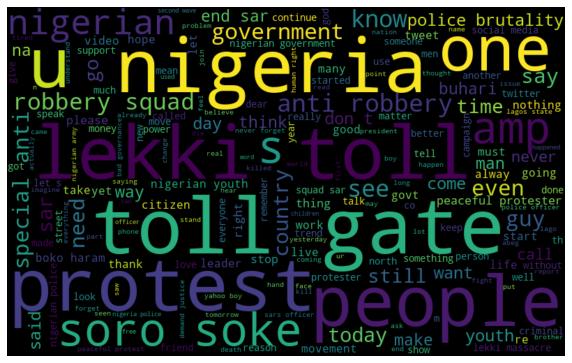

In [15]:
all_words = ' '.join([text for text in df['new_text']])
wordcloud = WordCloud(width=800, height=500, background_color='black',random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('plot_wordss.png', dpi=300, bbox_inches='tight')
plt.show()


## HASHTAG

In [17]:
# the column data['hashtags'] returns a list of string(s) for each tweet. Build a list of all hashtags in the dataset.
list_hashtag = []
for i in range(0, len(df)):
    # Obtain the current list of hashtags
    curr_hashtag = df.iloc[i, :]['hashtags']
    if type(curr_hashtag) == list:
        # Extract and append the hashtags to 'hashtag_list':
        for j in range(0, len(curr_hashtag)):
            list_hashtag.append(curr_hashtag[j])
hash_new = pd.DataFrame(list_hashtag, columns = ['hashtag'])


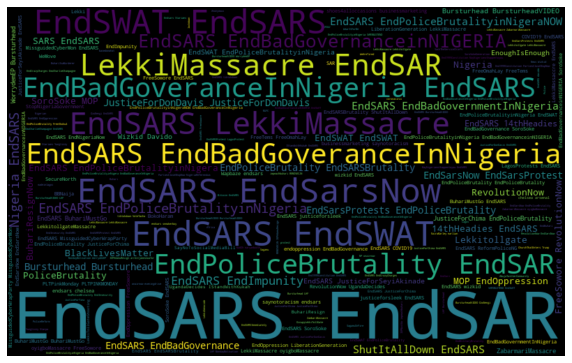

In [18]:
all_hashtag = ' '.join([text for text in hash_new['hashtag']])
wordcloud = WordCloud(width=800, height=500, background_color='black',random_state=21, max_font_size=110).generate(all_hashtag)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('plot_hashtags.png', dpi=300, bbox_inches='tight')

plt.show()


## TWEETS WITH THE HIGHEST LIKE COUNT

In [19]:
#GET THE INDEX LOCATIONS OF THE HIGHEST LIKE COUNT
df.iloc[df['like_count'].argmax()]


id                            1319065639319867392.0
author_id                                21247989.0
text                                  #EndSARS NOW!
created_at                2020-10-21 23:58:50+00:00
location                 Slauson Hills, Los Angeles
users_created_at           2009-02-18T22:17:46.000Z
name                                       Chilombo
username                                  JheneAiko
verified                                       True
possibly_sensitive                              NaN
reply_count                                   189.0
like_count                                  30684.0
quote_count                                   291.0
retweet_count                               15820.0
hashtags                                ['EndSARS']
state                                           NaN
country                                         NaN
mentions                                        NaN
followers_count                           2860190.0
following_co

In [20]:
df['created_at']

0         2020-02-07 23:59:49+00:00
1         2020-02-07 23:56:12+00:00
2         2020-02-07 23:55:58+00:00
3         2020-02-07 23:55:29+00:00
4         2020-02-07 23:54:32+00:00
                    ...            
157673    2020-11-30 14:23:58+00:00
157674    2020-11-30 14:23:49+00:00
157675    2020-11-30 14:23:17+00:00
157676    2020-11-30 14:22:54+00:00
157677    2020-11-30 14:21:39+00:00
Name: created_at, Length: 157678, dtype: object

In [21]:
df.iloc[df['like_count'].argmax()][['text', 'username', 'like_count']].values
#not argmax() in pandas is for maximum value

array(['#EndSARS NOW!', 'JheneAiko', 30684.0], dtype=object)

## TWEET WITH THE HIGHEST REPLY COUNT with the text ,username and the reply count

In [22]:
df.iloc[df['reply_count'].argmax()][['text', 'username', 'reply_count']].values


array(['I just lost my kid brother to these animals ffs! 💔💔💔 #EndSA',
       'Tcheek_', 1349.0], dtype=object)

In [23]:
df.iloc[df['reply_count'].argmax()]


id                                                   1307434742669860864.0
author_id                                                      598168233.0
text                     I just lost my kid brother to these animals ff...
created_at                                       2020-09-19 21:41:48+00:00
location                                                          The Moon
users_created_at                                  2012-06-03T06:41:15.000Z
name                                                 #JUSTICEFORSLEEK!!😡 🎱
username                                                           Tcheek_
verified                                                             False
possibly_sensitive                                                     NaN
reply_count                                                         1349.0
like_count                                                         13459.0
quote_count                                                          554.0
retweet_count            

## TWEET WITH THE HIGHEST RETWEET COUNT with the text ,username and the reply count

In [24]:
df.iloc[df['retweet_count'].argmax()]


id                           1341155663758708736.0
author_id                    1324704785220751360.0
text                      RT @rihanna: #ENDSARS 🇳🇬
created_at               2020-12-21 22:56:42+00:00
location                                       NaN
users_created_at          2020-11-06T13:27:36.000Z
name                                Miracle Friday
username                           jazzieblack4577
verified                                     False
possibly_sensitive                             NaN
reply_count                                    0.0
like_count                                     0.0
quote_count                                    0.0
retweet_count                             211528.0
hashtags                               ['ENDSARS']
state                                          NaN
country                                        NaN
mentions                               ['rihanna']
followers_count                               27.0
following_count                

In [176]:
df[df['referenced_tweet_type'] != 'retweeted']['retweet_count'].max()


211671.0

In [177]:
df.iloc[371626]

TypeError: Cannot index by location index with a non-integer key

In [24]:
df.iloc[df['retweet_count'].argmax()][['text', 'username', 'retweet_count']].values


array(['RT @rihanna: #ENDSARS 🇳🇬', 'jazzieblack4577', 211528.0],
      dtype=object)

In [ ]:
df.iloc[df['retweet_c'].argmax()][['text', 'username', 'retweet_count']].values


## CLEAN DATETIME 

In [25]:
df['created_at'] = pd.to_datetime(df.created_at,utc=True)


In [ ]:
**When the did movement start on social media? When did it reach critical mass?**

In [ ]:
average retweet was getting per month

C:\Users\USER\anaconda3\envs\endsarsproject\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


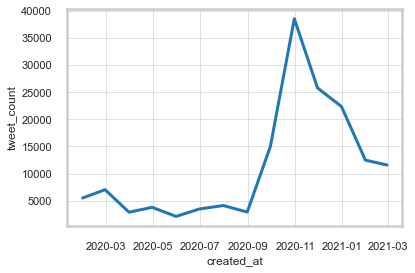

In [26]:
date_tweet = df.groupby([pd.Grouper(key='created_at', freq='1M')]).size()
date_tweet = pd.DataFrame(date_tweet, columns=['tweet_count'])
date_tweet.reset_index(drop=False, inplace=True)
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})


sns.lineplot(date_tweet['created_at'], date_tweet['tweet_count'], )
plt.savefig('time.png', dpi=300, bbox_inches='tight')


In [ ]:
date_tweet = df.groupby([pd.Grouper(key='created_at', freq='1M')]).size()
date_tweet = pd.DataFrame(date_tweet, columns=['tweet_count'])
date_tweet.reset_index(drop=False, inplace=True)
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})


sns.lineplot(date_tweet['created_at'], date_tweet['tweet_count'], )

In [186]:
df.groupby([pd.Grouper(key='created_at', freq='1W')]).mean()


,result_count,reply_count,like_count,quote_count,retweet_count,followers_count,following_count,tweet_count,listed_count,referenced_tweet_id,user_id
created_at,,,,,,,,,,,
2020-01-05 00:00:00+00:00,NaN,0.409821,2.056448,0.325838,200.777421,18616.442688,2786.313834,59715.060079,22.067984,1.206690e+18,NaN
2020-01-12 00:00:00+00:00,NaN,0.142909,1.034915,0.063695,556.610610,5787.255086,2093.145654,38601.023736,8.796702,1.210773e+18,NaN
2020-01-19 00:00:00+00:00,NaN,0.227956,1.874887,0.077856,236.585189,5880.273733,2367.155146,47573.582488,9.950538,1.205155e+18,NaN
2020-01-26 00:00:00+00:00,NaN,0.210940,2.354702,0.118810,441.495585,6013.019587,2515.628891,53896.545645,10.064008,1.208179e+18,NaN
2020-02-02 00:00:00+00:00,NaN,0.095750,0.599202,0.033911,2382.431640,6519.102184,2241.957326,43488.669278,10.012002,1.212893e+18,NaN
2020-02-09 00:00:00+00:00,NaN,0.284611,2.767409,0.136347,651.863279,7472.131953,2417.116838,45437.100665,10.728990,1.220642e+18,NaN
2020-02-16 00:00:00+00:00,NaN,0.153486,3.248011,0.187646,689.174544,15076.181479,2782.681105,69083.107543,36.834205,1.209067e+18,NaN
2020-02-23 00:00:00+00:00,NaN,0.224476,3.413869,0.089489,610.460189,8621.425958,2265.430749,75084.717334,15.341899,1.221289e+18,NaN
2020-03-01 00:00:00+00:00,NaN,0.089847,0.918518,0.050139,1856.640339,5108.101361,2072.940148,46876.684550,10.262659,1.232284e+18,NaN


In [ ]:
date_tweet = df.groupby([pd.Grouper(key='created_at', freq='1W')]).mean()


In [67]:
df[['created_at', 'tweet_count']]


,created_at,tweet_count
0,2020-02-07 23:59:49+00:00,1355.0
1,2020-02-07 23:56:12+00:00,1445.0
2,2020-02-07 23:55:58+00:00,1628.0
3,2020-02-07 23:55:29+00:00,28693.0
4,2020-02-07 23:54:32+00:00,3855.0
...,...,...
157673,2020-11-30 14:23:58+00:00,NaN
157674,2020-11-30 14:23:49+00:00,NaN
157675,2020-11-30 14:23:17+00:00,NaN
157676,2020-11-30 14:22:54+00:00,NaN


In [42]:
import pycountry


In [45]:
list(pycountry.countries)


[Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia'),
 Country(alpha_2='AS', alpha_3='ASM', nam

In [124]:
countries = pd.read_csv('wikipedia-iso-country-codes.csv')


In [125]:
countries

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
5,Andorra,AD,AND,20,ISO 3166-2:AD
6,Angola,AO,AGO,24,ISO 3166-2:AO
7,Anguilla,AI,AIA,660,ISO 3166-2:AI
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ
9,Antigua and Barbuda,AG,ATG,28,ISO 3166-2:AG


In [126]:
countries.drop(['Alpha-3 code', 'Numeric code','ISO 3166-2'], axis = 1,inplace=True)


In [127]:
countries.rename({'English short name lower case': 'country_name', 'Alpha-2 code': 'country_code'}, axis=1,inplace=True)  # new method


In [128]:
countries

,country_name,country_code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
5,Andorra,AD
6,Angola,AO
7,Anguilla,AI
8,Antarctica,AQ
9,Antigua and Barbuda,AG


In [198]:
df.columns

Index(['id', 'author_id', 'text', 'created_at', 'in_reply_to_user_id', 'geo',
       'users', 'tweets', 'places', 'newest_id', 'oldest_id', 'result_count',
       'next_token', 'location', 'users_created_at', 'name', 'username',
       'verified', 'possibly_sensitive', 'reply_count', 'like_count',
       'quote_count', 'retweet_count', 'hashtags', 'state', 'country',
       'mentions', 'followers_count', 'following_count', 'tweet_count',
       'listed_count', 'referenced_tweet_type', 'referenced_tweet_id', 'lang',
       'user_id', 'description', 'entities', 'referenced_tweets',
       'public_metrics_x', 'withheld', 'created_at_y', 'public_metrics_y',
       'City', 'users_location', 'user_public_metrics', 'user_location',
       'user_created_at', 'user_name', 'user_verified', 'user_reply_count',
       'user_like_count', 'user_quote_count', 'user_retweet_count',
       'clean_text', 'joined_text', 'new_text'],
      dtype='object')

In [207]:
df.sort_values('retweet_count',ascending=False,axis=0)['text'].iloc[0]

'RT @rihanna: #ENDSARS 🇳🇬 https://t.co/59lrs8JnDA'

In [ ]:
    movies["Rating"].append(rating.group().strip())


In [123]:
countries

[]

In [104]:
df['location']=df['location'].str.extract(r'(.+),\s(.+)').dropna()



In [112]:
df['users_location']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
157673    NaN
157674    NaN
157675    NaN
157676    NaN
157677    NaN
Name: users_location, Length: 157678, dtype: object

In [106]:
df.columns

Index(['id', 'author_id', 'text', 'created_at', 'location', 'users_created_at',
       'name', 'username', 'verified', 'possibly_sensitive', 'reply_count',
       'like_count', 'quote_count', 'retweet_count', 'hashtags', 'state',
       'country', 'mentions', 'followers_count', 'following_count',
       'tweet_count', 'listed_count', 'referenced_tweet_type',
       'referenced_tweet_id', 'lang', 'user_id', 'description', 'entities',
       'referenced_tweets', 'public_metrics_x', 'withheld', 'created_at_y',
       'public_metrics_y', 'City', 'users_location', 'user_public_metrics',
       'user_location', 'user_created_at', 'user_name', 'user_verified',
       'user_reply_count', 'user_like_count', 'user_quote_count',
       'user_retweet_count', 'clean_text', 'joined_text'],
      dtype='object')

In [51]:
df_countries = (countries)

In [28]:
Country = [
    ('US', 'United States'),
    ('AF', 'Afghanistan'),
    ('AL', 'Albania'),
    ('DZ', 'Algeria'),
    ('AS', 'American Samoa'),
    ('AD', 'Andorra'),
    ('AO', 'Angola'),
    ('AI', 'Anguilla'),
    ('AQ', 'Antarctica'),
    ('AG', 'Antigua And Barbuda'),
    ('AR', 'Argentina'),
    ('AM', 'Armenia'),
    ('AW', 'Aruba'),
    ('AU', 'Australia'),
    ('AT', 'Austria'),
    ('AZ', 'Azerbaijan'),
    ('BS', 'Bahamas'),
    ('BH', 'Bahrain'),
    ('BD', 'Bangladesh'),
    ('BB', 'Barbados'),
    ('BY', 'Belarus'),
    ('BE', 'Belgium'),
    ('BZ', 'Belize'),
    ('BJ', 'Benin'),
    ('BM', 'Bermuda'),
    ('BT', 'Bhutan'),
    ('BO', 'Bolivia'),
    ('BA', 'Bosnia And Herzegowina'),
    ('BW', 'Botswana'),
    ('BV', 'Bouvet Island'),
    ('BR', 'Brazil'),
    ('BN', 'Brunei Darussalam'),
    ('BG', 'Bulgaria'),
    ('BF', 'Burkina Faso'),
    ('BI', 'Burundi'),
    ('KH', 'Cambodia'),
    ('CM', 'Cameroon'),
    ('CA', 'Canada'),
    ('CV', 'Cape Verde'),
    ('KY', 'Cayman Islands'),
    ('CF', 'Central African Rep'),
    ('TD', 'Chad'),
    ('CL', 'Chile'),
    ('CN', 'China'),
    ('CX', 'Christmas Island'),
    ('CC', 'Cocos Islands'),
    ('CO', 'Colombia'),
    ('KM', 'Comoros'),
    ('CG', 'Congo'),
    ('CK', 'Cook Islands'),
    ('CR', 'Costa Rica'),
    ('CI', 'Cote D`ivoire'),
    ('HR', 'Croatia'),
    ('CU', 'Cuba'),
    ('CY', 'Cyprus'),
    ('CZ', 'Czech Republic'),
    ('DK', 'Denmark'),
    ('DJ', 'Djibouti'),
    ('DM', 'Dominica'),
    ('DO', 'Dominican Republic'),
    ('TP', 'East Timor'),
    ('EC', 'Ecuador'),
    ('EG', 'Egypt'),
    ('SV', 'El Salvador'),
    ('GQ', 'Equatorial Guinea'),
    ('ER', 'Eritrea'),
    ('EE', 'Estonia'),
    ('ET', 'Ethiopia'),
    ('FK', 'Falkland Islands (Malvinas)'),
    ('FO', 'Faroe Islands'),
    ('FJ', 'Fiji'),
    ('FI', 'Finland'),
    ('FR', 'France'),
    ('GF', 'French Guiana'),
    ('PF', 'French Polynesia'),
    ('TF', 'French S. Territories'),
    ('GA', 'Gabon'),
    ('GM', 'Gambia'),
    ('GE', 'Georgia'),
    ('DE', 'Germany'),
    ('GH', 'Ghana'),
    ('GI', 'Gibraltar'),
    ('GR', 'Greece'),
    ('GL', 'Greenland'),
    ('GD', 'Grenada'),
    ('GP', 'Guadeloupe'),
    ('GU', 'Guam'),
    ('GT', 'Guatemala'),
    ('GN', 'Guinea'),
    ('GW', 'Guinea-bissau'),
    ('GY', 'Guyana'),
    ('HT', 'Haiti'),
    ('HN', 'Honduras'),
    ('HK', 'Hong Kong'),
    ('HU', 'Hungary'),
    ('IS', 'Iceland'),
    ('IN', 'India'),
    ('ID', 'Indonesia'),
    ('IR', 'Iran'),
    ('IQ', 'Iraq'),
    ('IE', 'Ireland'),
    ('IL', 'Israel'),
    ('IT', 'Italy'),
    ('JM', 'Jamaica'),
    ('JP', 'Japan'),
    ('JO', 'Jordan'),
    ('KZ', 'Kazakhstan'),
    ('KE', 'Kenya'),
    ('KI', 'Kiribati'),
    ('KP', 'Korea (North)'),
    ('KR', 'Korea (South)'),
    ('KW', 'Kuwait'),
    ('KG', 'Kyrgyzstan'),
    ('LA', 'Laos'),
    ('LV', 'Latvia'),
    ('LB', 'Lebanon'),
    ('LS', 'Lesotho'),
    ('LR', 'Liberia'),
    ('LY', 'Libya'),
    ('LI', 'Liechtenstein'),
    ('LT', 'Lithuania'),
    ('LU', 'Luxembourg'),
    ('MO', 'Macau'),
    ('MK', 'Macedonia'),
    ('MG', 'Madagascar'),
    ('MW', 'Malawi'),
    ('MY', 'Malaysia'),
    ('MV', 'Maldives'),
    ('ML', 'Mali'),
    ('MT', 'Malta'),
    ('MH', 'Marshall Islands'),
    ('MQ', 'Martinique'),
    ('MR', 'Mauritania'),
    ('MU', 'Mauritius'),
    ('YT', 'Mayotte'),
    ('MX', 'Mexico'),
    ('FM', 'Micronesia'),
    ('MD', 'Moldova'),
    ('MC', 'Monaco'),
    ('MN', 'Mongolia'),
    ('MS', 'Montserrat'),
    ('MA', 'Morocco'),
    ('MZ', 'Mozambique'),
    ('MM', 'Myanmar'),
    ('NA', 'Namibia'),
    ('NR', 'Nauru'),
    ('NP', 'Nepal'),
    ('NL', 'Netherlands'),
    ('AN', 'Netherlands Antilles'),
    ('NC', 'New Caledonia'),
    ('NZ', 'New Zealand'),
    ('NI', 'Nicaragua'),
    ('NE', 'Niger'),
    ('NG', 'Nigeria'),
    ('NU', 'Niue'),
    ('NF', 'Norfolk Island'),
    ('MP', 'Northern Mariana Islands'),
    ('NO', 'Norway'),
    ('OM', 'Oman'),
    ('PK', 'Pakistan'),
    ('PW', 'Palau'),
    ('PA', 'Panama'),
    ('PG', 'Papua New Guinea'),
    ('PY', 'Paraguay'),
    ('PE', 'Peru'),
    ('PH', 'Philippines'),
    ('PN', 'Pitcairn'),
    ('PL', 'Poland'),
    ('PT', 'Portugal'),
    ('PR', 'Puerto Rico'),
    ('QA', 'Qatar'),
    ('RE', 'Reunion'),
    ('RO', 'Romania'),
    ('RU', 'Russian Federation'),
    ('RW', 'Rwanda'),
    ('KN', 'Saint Kitts And Nevis'),
    ('LC', 'Saint Lucia'),
    ('VC', 'St Vincent/Grenadines'),
    ('WS', 'Samoa'),
    ('SM', 'San Marino'),
    ('ST', 'Sao Tome'),
    ('SA', 'Saudi Arabia'),
    ('SN', 'Senegal'),
    ('SC', 'Seychelles'),
    ('SL', 'Sierra Leone'),
    ('SG', 'Singapore'),
    ('SK', 'Slovakia'),
    ('SI', 'Slovenia'),
    ('SB', 'Solomon Islands'),
    ('SO', 'Somalia'),
    ('ZA', 'South Africa'),
    ('ES', 'Spain'),
    ('LK', 'Sri Lanka'),
    ('SH', 'St. Helena'),
    ('PM', 'St.Pierre'),
    ('SD', 'Sudan'),
    ('SR', 'Suriname'),
    ('SZ', 'Swaziland'),
    ('SE', 'Sweden'),
    ('CH', 'Switzerland'),
    ('SY', 'Syrian Arab Republic'),
    ('TW', 'Taiwan'),
    ('TJ', 'Tajikistan'),
    ('TZ', 'Tanzania'),
    ('TH', 'Thailand'),
    ('TG', 'Togo'),
    ('TK', 'Tokelau'),
    ('TO', 'Tonga'),
    ('TT', 'Trinidad And Tobago'),
    ('TN', 'Tunisia'),
    ('TR', 'Turkey'),
    ('TM', 'Turkmenistan'),
    ('TV', 'Tuvalu'),
    ('UG', 'Uganda'),
    ('UA', 'Ukraine'),
    ('AE', 'United Arab Emirates'),
    ('UK', 'United Kingdom'),
    ('UY', 'Uruguay'),
    ('UZ', 'Uzbekistan'),
    ('VU', 'Vanuatu'),
    ('VA', 'Vatican City State'),
    ('VE', 'Venezuela'),
    ('VN', 'Viet Nam'),
    ('VG', 'Virgin Islands (British)'),
    ('VI', 'Virgin Islands (U.S.)'),
    ('EH', 'Western Sahara'),
    ('YE', 'Yemen'),
    ('YU', 'Yugoslavia'),
    ('ZR', 'Zaire'),
    ('ZM', 'Zambia'),
    ('ZW', 'Zimbabwe')
]

In [35]:
df.columns

Index(['id', 'author_id', 'text', 'created_at', 'location', 'users_created_at',
       'name', 'username', 'verified', 'possibly_sensitive', 'reply_count',
       'like_count', 'quote_count', 'retweet_count', 'hashtags', 'state',
       'country', 'mentions', 'followers_count', 'following_count',
       'tweet_count', 'listed_count', 'referenced_tweet_type',
       'referenced_tweet_id', 'lang', 'user_id', 'description', 'entities',
       'referenced_tweets', 'public_metrics_x', 'withheld', 'created_at_y',
       'public_metrics_y', 'City', 'users_location', 'user_public_metrics',
       'user_location', 'user_created_at', 'user_name', 'user_verified',
       'user_reply_count', 'user_like_count', 'user_quote_count',
       'user_retweet_count', 'clean_text', 'joined_text', 'new_text'],
      dtype='object')

In [40]:
df['users_location']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
157673    NaN
157674    NaN
157675    NaN
157676    NaN
157677    NaN
Name: users_location, Length: 157678, dtype: object

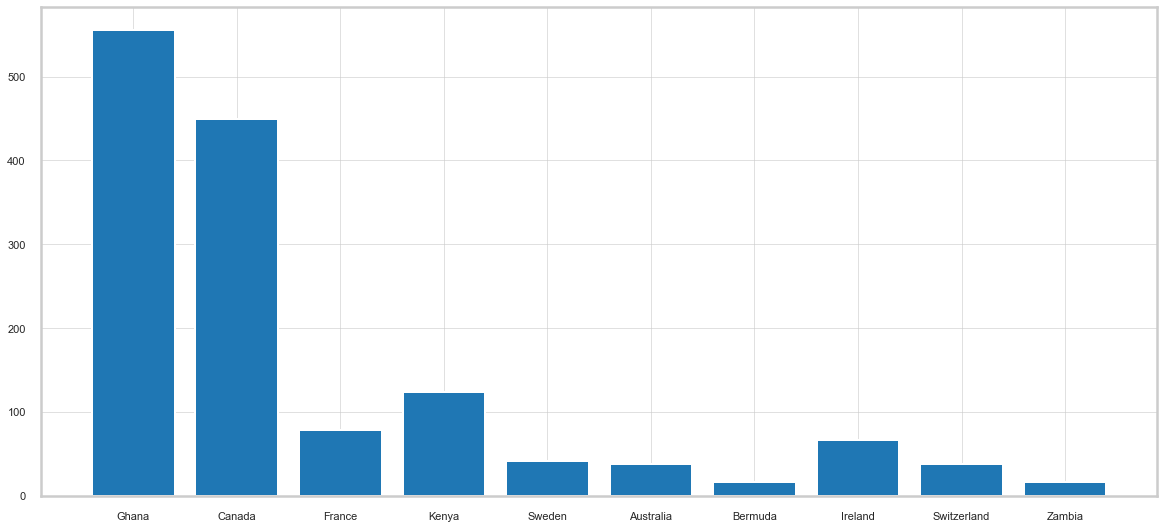

In [41]:
location = []
for loc in df['location'].dropna():
    locs = loc.split()
    location.extend(locs)
    
from collections import Counter
locations = Counter(location)

countries = []
for code, country in Country:
    if country in location:
        countries.append(country)

count_country = {}
for loc in locations:
    if loc in countries and loc!='Nigeria':
        count_country.update({loc:locations[loc]})
        
D = count_country
plt.figure(figsize=(20,9))
plt.bar(range(0,10), list(D.values())[:10], align='center')
plt.xticks(range(0,10), list(D.keys())[:10])
plt.savefig('bar.png', dpi=300, bbox_inches='tight')
